In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style(style='darkgrid')

In [2]:
heart = pd.read_csv(r'C:/Users/avdho/Desktop/PROJECTS/heart/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1] age
2] sex, 0 = female, 1 = male
3] cp, chest pain, 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic
4] trestbps, resting blood pressure (in mm Hg)
5] chol, serum cholesterol in mg/dl
6] fbs, fasting blood sugar 0 = >=120 mg/dl , 1= <120 mg/dl
7] restecg, resting electrocardiographic results 1 = normal, 2 = having ST-T wave abnormality, 3 = showing probable or definite left ventricular hypertrophy
8] thalach, maximum heart rate achieved
9] exang, exercise induced angina, 0 = no, 1 = yes
10] oldpeak, ST depression induced by exercise relative to rest 1 = upsloping, 2 = flat, 3 = downsloping
11] slope, the slope of the peak exercise ST segment,1 = upsloping, 2 = flat, 3 = downsloping
12] ca, number of major vessels (0-3) colored by fluoroscopy
13] thal, this is short of thalium heart scan, 3 = normal (no cold spots), 6 = fixed defect (cold spots during rest and exercise), 7 = reversible defect (when cold spots only appear during exercise)
14] target, diagnosis of heart disease, the predicted attribute

In [3]:
heart.shape # to see how many rows and columns we have in the dataset

(303, 14)

In [4]:
#Let's get the statistical summary of the data
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Checking for any missing values in the data
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- There are total 14 columns and 303 rows present in the dataset
- There are no null values present in the data

In [10]:
# Checking the data types for each variable
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
print('Heart Disease', round(heart['target'].value_counts()[1]/len(heart)*100,2), '% of the target')
print('Heart Disease', round(heart['target'].value_counts()[0]/len(heart)*100,2), '% of the target')

Heart Disease 54.46 % of the target
Heart Disease 45.54 % of the target


Text(0.5, 1.0, 'Class Distributions \n 0: No Disease || 1: Disease')

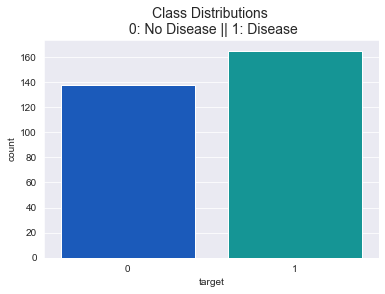

In [12]:
# Number of No Disease and Disease heart patients
sns.countplot('target', data=heart, palette="winter")
plt.title('Class Distributions \n 0: No Disease || 1: Disease', fontsize=14)

Text(0.5, 1.0, 'Chest Pain\\ 0 = typical angenia, 1 = atypical angenia, 2 = non-anginal pain, 3 = asymptomatic')

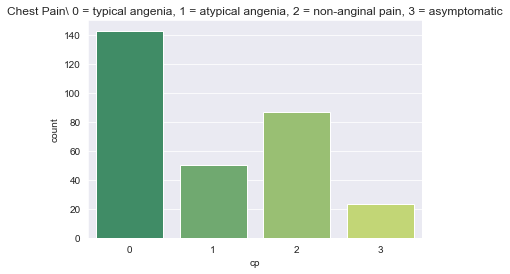

In [13]:
sns.countplot('cp', data = heart, palette="summer")
plt.title('Chest Pain\ 0 = typical angenia, 1 = atypical angenia, 2 = non-anginal pain, 3 = asymptomatic')

In [14]:
# to check the distribution and skewness of attributes
sns.set(style="white", palette="PuBuGn_d", color_codes=True)

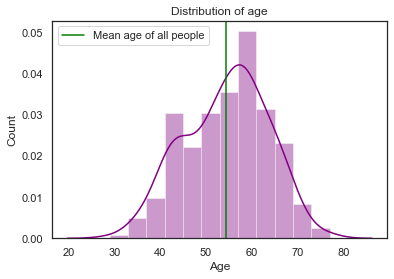

In [15]:
age = heart['age'].values
sns.distplot(age, color='purple')
plt.axvline(np.mean(age), c='green', label='Mean age of all people')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of age')
plt.show()

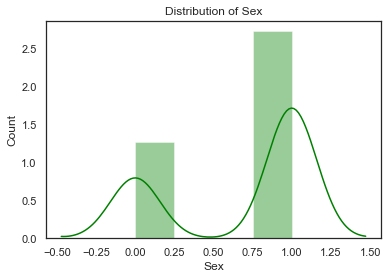

In [16]:
sex = heart['sex'].values
sns.distplot(sex, color='green')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

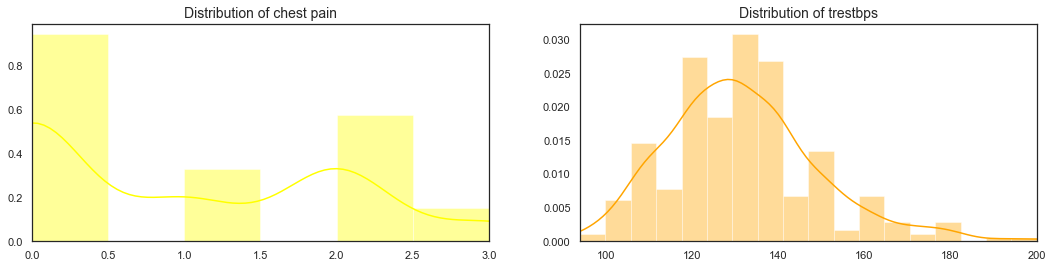

In [17]:
fig, ax = plt.subplots(1,2,figsize=(18,4))
cp = heart['cp'].values
trestbps = heart['trestbps'].values
sns.distplot(cp, ax=ax[0], color='yellow')
ax[0].set_title('Distribution of chest pain', fontsize=14)
ax[0].set_xlim([min(cp), max(cp)])
sns.distplot(trestbps, ax=ax[1], color='orange')
ax[1].set_title('Distribution of trestbps', fontsize=14)
ax[1].set_xlim([min(trestbps), max(trestbps)])
plt.show()

(94, 200)

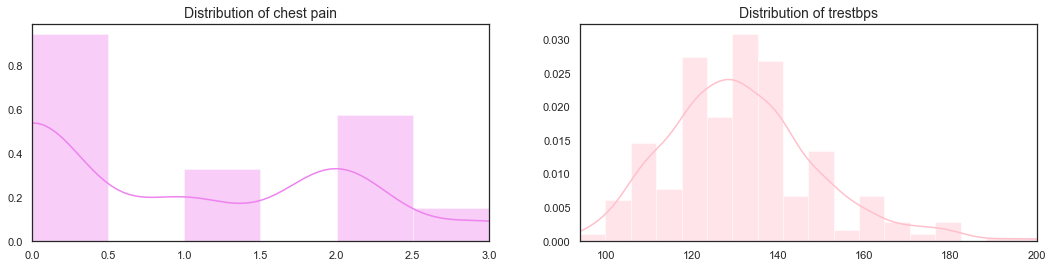

In [18]:
fig, ax = plt.subplots(1,2,figsize=(18,4))
chol = heart['chol'].values
fbs = heart['fbs'].values
sns.distplot(cp, ax=ax[0], color='violet')
ax[0].set_title('Distribution of chest pain', fontsize=14)
ax[0].set_xlim([min(cp), max(cp)])
sns.distplot(trestbps, ax=ax[1], color='pink')
ax[1].set_title('Distribution of trestbps', fontsize=14)
ax[1].set_xlim([min(trestbps), max(trestbps)])

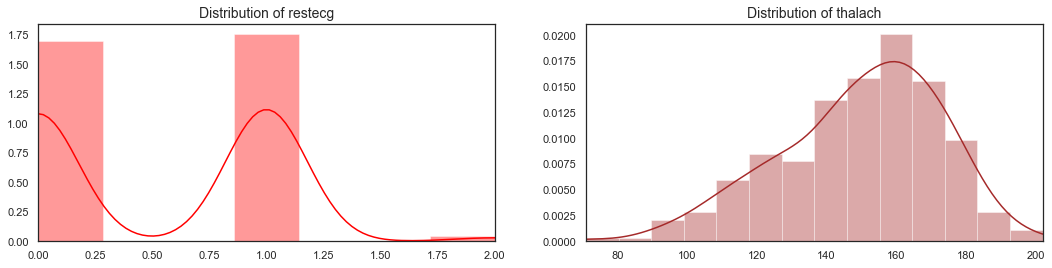

In [19]:
fig, ax = plt.subplots(1,2,figsize=(18,4))
restecg = heart['restecg'].values
thalach = heart['thalach'].values
sns.distplot(restecg, ax=ax[0], color='red')
ax[0].set_title('Distribution of restecg', fontsize=14)
ax[0].set_xlim([min(restecg), max(restecg)])
sns.distplot(thalach, ax=ax[1], color='brown')
ax[1].set_title('Distribution of thalach', fontsize=14)
ax[1].set_xlim([min(thalach), max(thalach)])
plt.show()

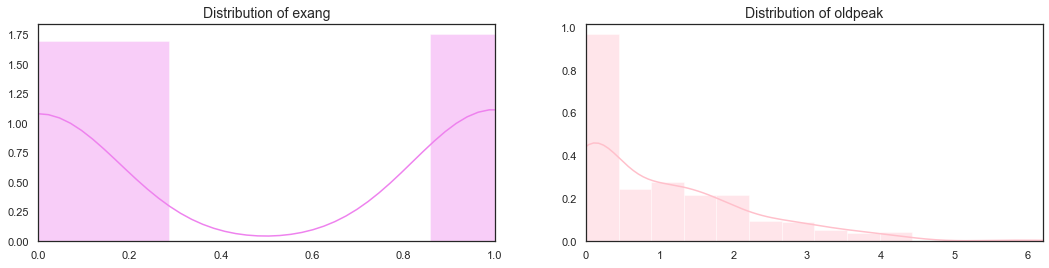

In [20]:
fig, ax = plt.subplots(1,2,figsize=(18,4))
exang = heart['exang'].values
oldpeak = heart['oldpeak'].values
sns.distplot(restecg, ax=ax[0], color='violet')
ax[0].set_title('Distribution of exang', fontsize=14)
ax[0].set_xlim([min(exang), max(exang)])
sns.distplot(oldpeak, ax=ax[1], color='pink')
ax[1].set_title('Distribution of oldpeak', fontsize=14)
ax[1].set_xlim([min(oldpeak), max(oldpeak)])
plt.show()

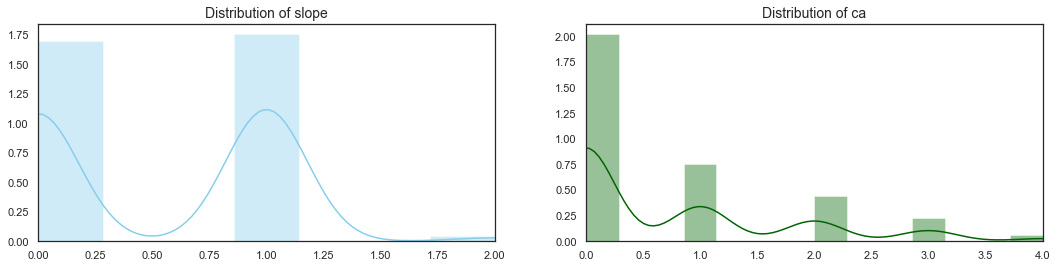

In [21]:
fig, ax = plt.subplots(1,2,figsize=(18,4))
slope = heart['slope'].values
ca = heart['ca'].values
sns.distplot(restecg, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of slope', fontsize=14)
ax[0].set_xlim([min(slope), max(slope)])
sns.distplot(ca, ax=ax[1], color='darkgreen')
ax[1].set_title('Distribution of ca', fontsize=14)
ax[1].set_xlim([min(ca), max(ca)])
plt.show()

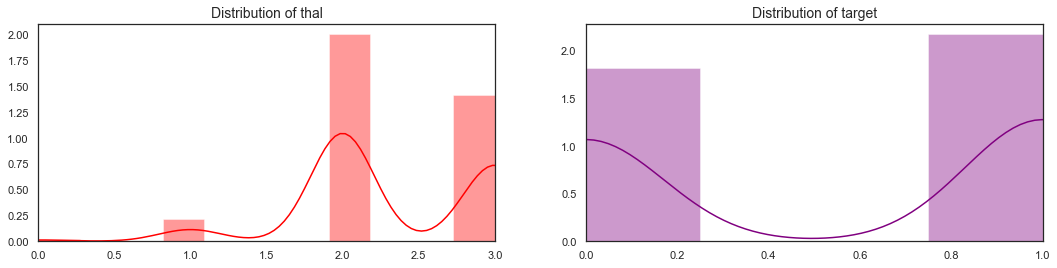

In [22]:
fig, ax = plt.subplots(1,2,figsize=(18,4))
thal = heart['thal'].values
target = heart['target'].values
sns.distplot(thal, ax=ax[0], color='red')
ax[0].set_title('Distribution of thal', fontsize=14)
ax[0].set_xlim([min(thal), max(thal)])
sns.distplot(target, ax=ax[1], color='purple')
ax[1].set_title('Distribution of target', fontsize=14)
ax[1].set_xlim([min(target), max(target)])
plt.show()

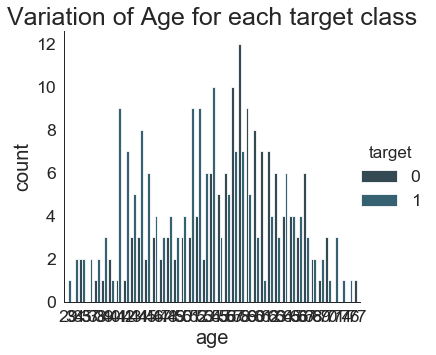

In [23]:
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = heart, x = 'age', hue = 'target', order = heart['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

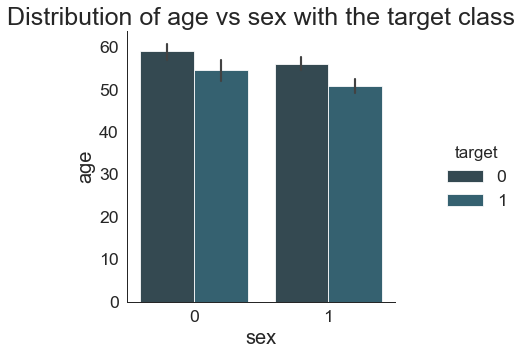

In [24]:
sns.catplot(kind = 'bar', data = heart, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()
# 1=Male; 0=Female

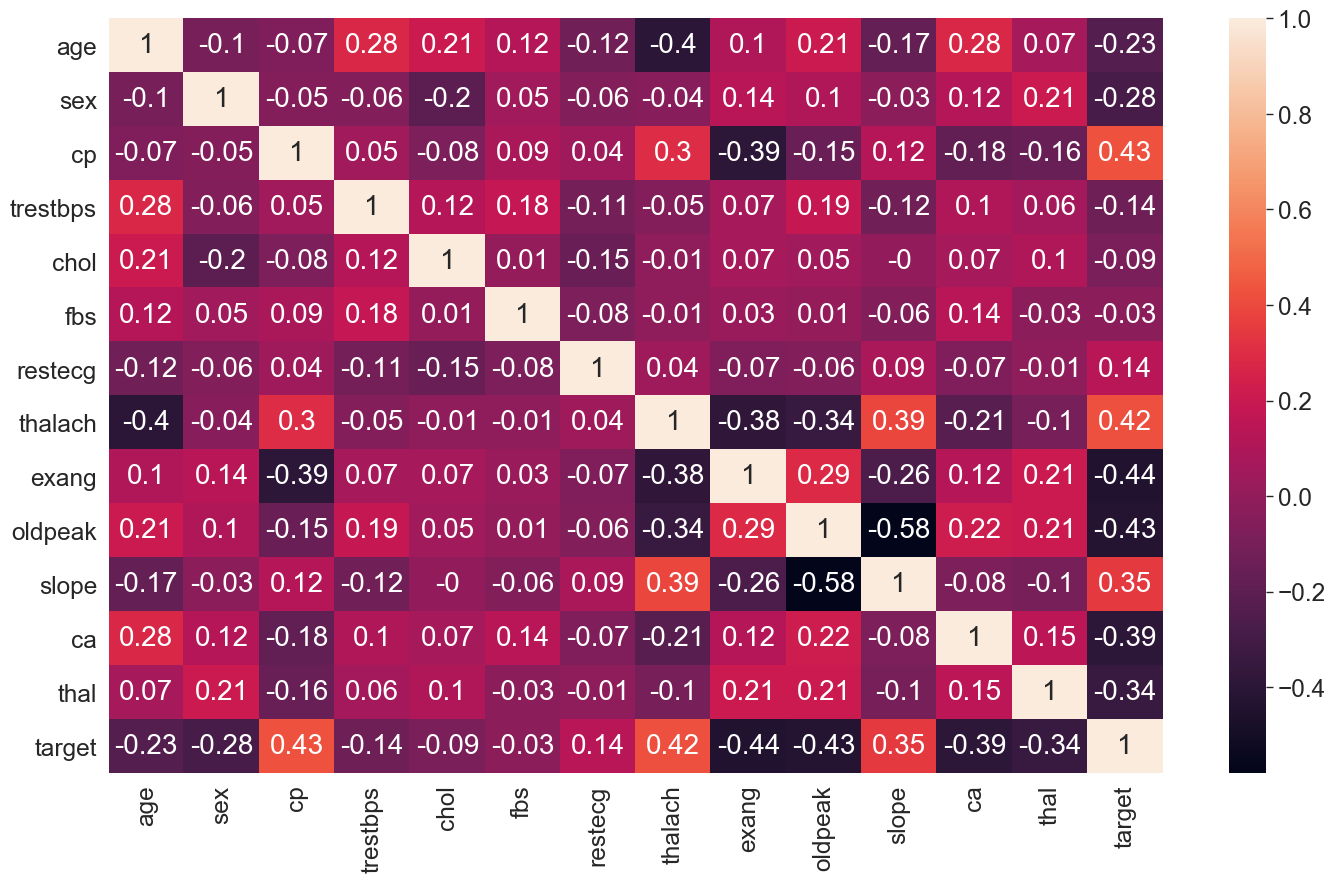

In [26]:
plt.figure(figsize=(17,10), dpi=100)
sns.heatmap(np.round(heart.corr(), 2), annot = True)
plt.show()

In [27]:
# How many people are dia
s = heart.groupby(['sex', 'age'])['target'].count().reset_index().sort_values(by='target', ascending=False)
s.head(20).style.background_gradient(cmap='Purples')

,sex,age,target
59,1,58,13
58,1,57,13
60,1,59,13
53,1,52,12
55,1,54,11
45,1,44,9
52,1,51,8
57,1,56,8
61,1,60,7
65,1,64,7


In [28]:
diseased = heart[heart['target'] == 1]
diseased.groupby("sex").count()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,72,72,72,72,72,72,72,72,72,72,72,72,72
1,93,93,93,93,93,93,93,93,93,93,93,93,93


In [29]:
# Heart attacks for respective sex with different levels of chest pain
s = heart.groupby(['sex', 'cp'])['target'].count().reset_index().sort_values(by='target', ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,sex,cp,target
4,1,0,104
6,1,2,52
0,0,0,39
2,0,2,35
5,1,1,32
7,1,3,19
1,0,1,18
3,0,3,4


In [30]:
# number of heart diseases diagnosed in accordance with cholestrol level forrespective gender 
s = heart.groupby(['sex', 'chol'])['target'].count().reset_index().sort_values(by='target', ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,sex,chol,target
115,1,212,5
109,1,204,4
135,1,234,4
134,1,233,4
172,1,282,4
150,1,254,4
48,0,269,4
144,1,246,3
143,1,245,3
141,1,243,3


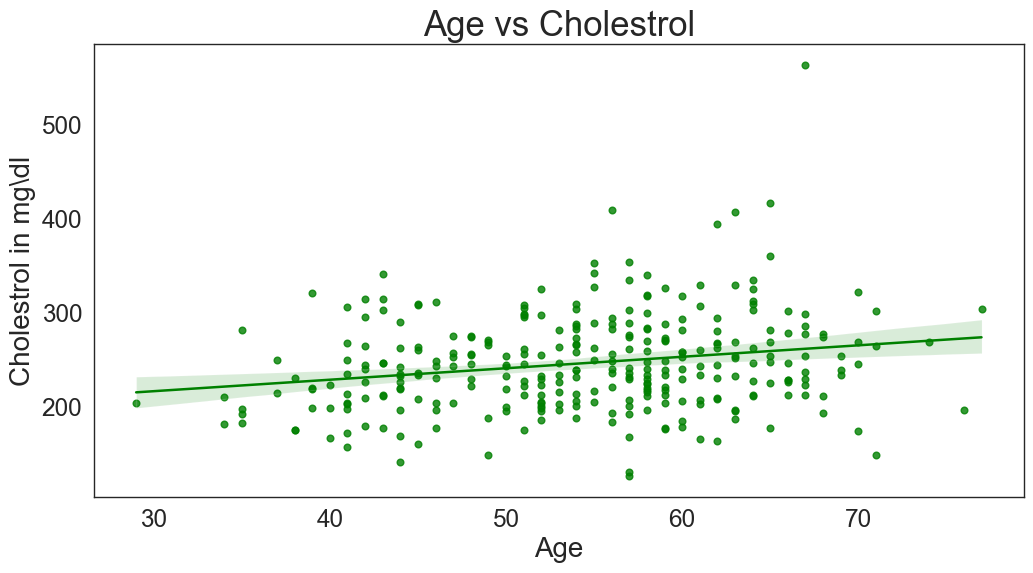

In [31]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='age',y='chol',data=heart,color='Green')
plt.xlabel('Age')
plt.ylabel('Cholestrol in mg\dl')
plt.title('Age vs Cholestrol')
plt.show()

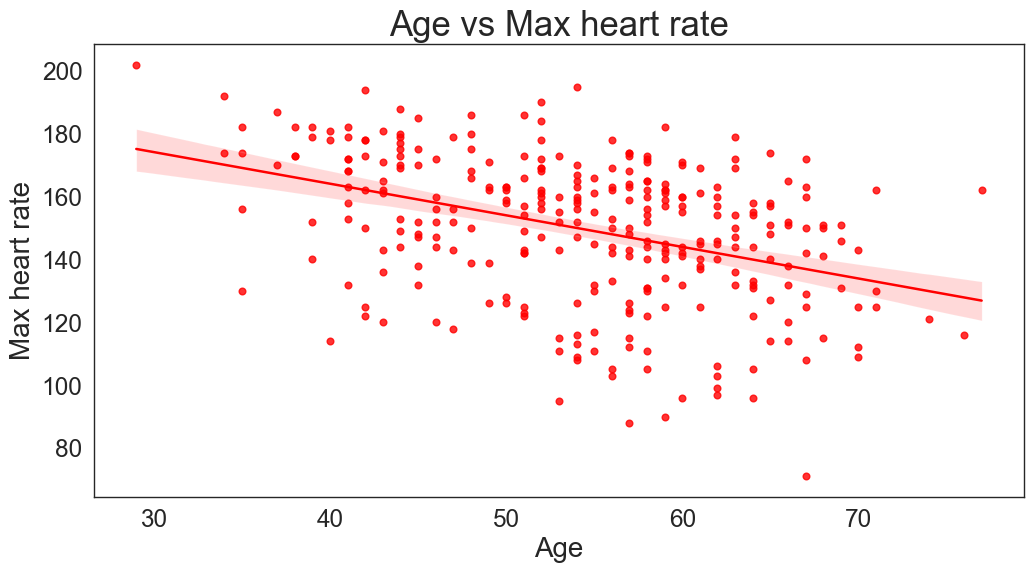

In [32]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='age', y='thalach', data=heart, color='Red')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.title('Age vs Max heart rate')
plt.show()

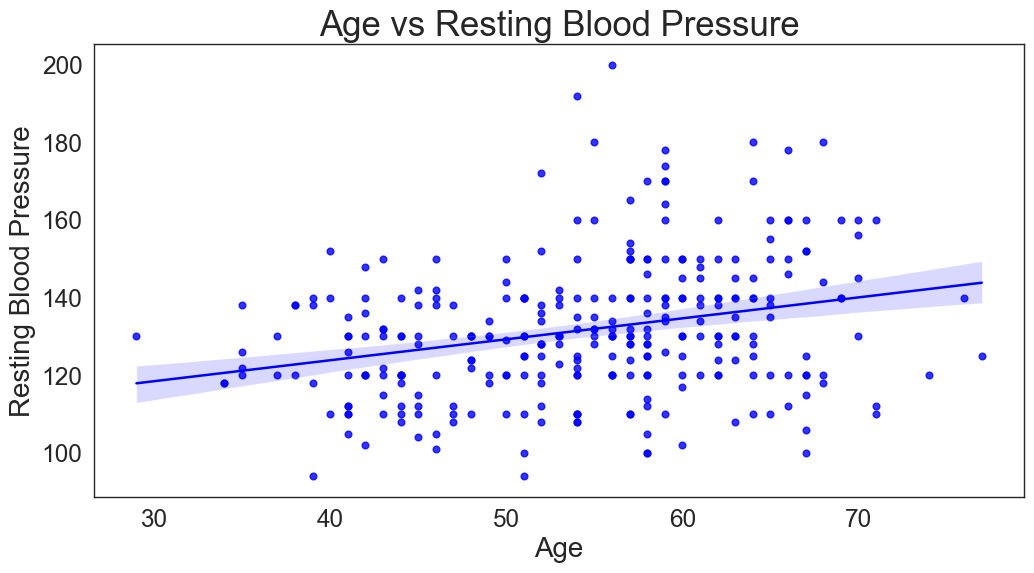

In [33]:
plt.figure(figsize=(12,6), dpi=100)
sns.regplot(x='age', y='trestbps', data=heart, color='Blue')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('Age vs Resting Blood Pressure')
plt.show()

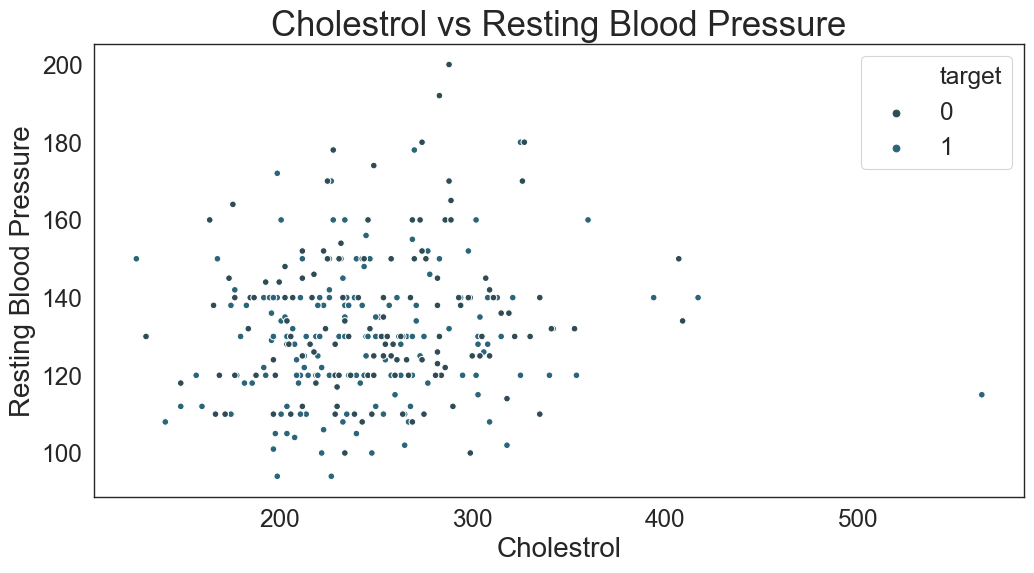

In [34]:
plt.figure(figsize=(12,6), dpi=100)
sns.scatterplot(x='chol', y='trestbps', data=heart, hue='target')
plt.xlabel('Cholestrol')
plt.ylabel('Resting Blood Pressure')
plt.title('Cholestrol vs Resting Blood Pressure')
plt.show()

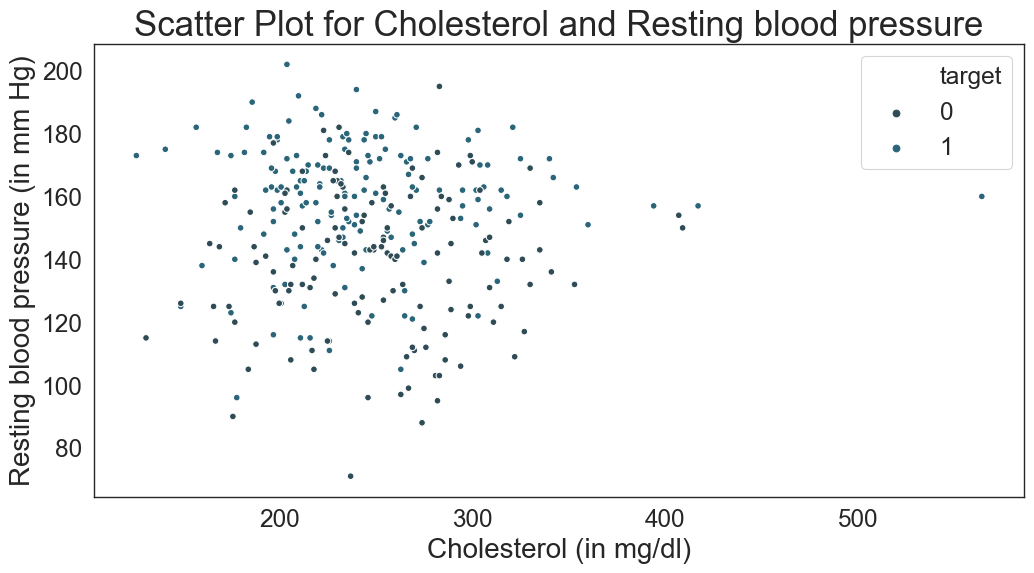

In [35]:
plt.figure(figsize=(12,6),dpi=100)
sns.scatterplot(x='chol',y='thalach',data=heart,hue='target')
plt.xlabel('Cholesterol (in mg/dl)')
plt.ylabel('Resting blood pressure (in mm Hg)')
plt.title('Scatter Plot for Cholesterol and Resting blood pressure')
plt.show()

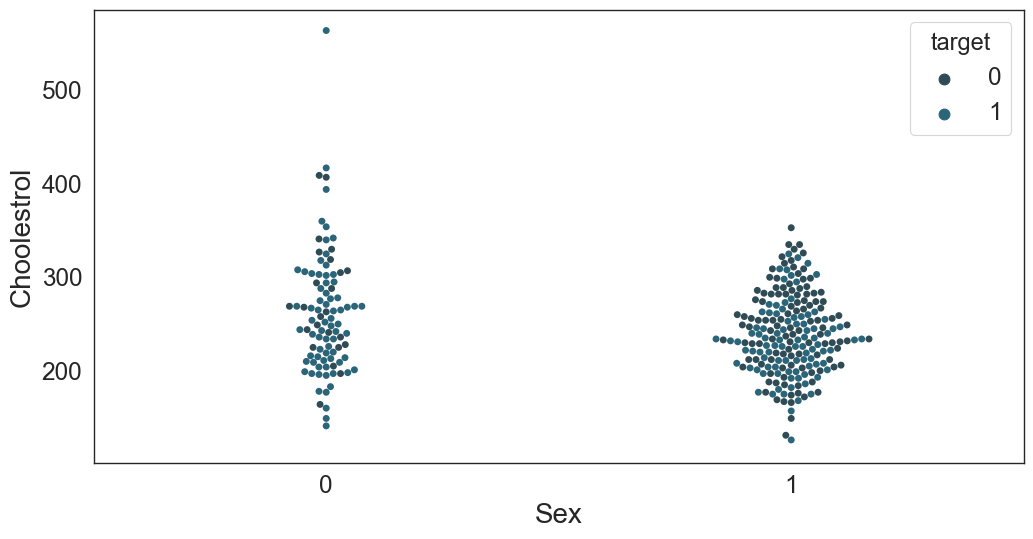

In [36]:
# study of relationship between Sex with Cholestrol, Max heart rate and Resting Blood Pressure with respect to target
plt.figure(figsize=(12,6),dpi=100)
sns.swarmplot(x='sex', y='chol', data=heart, hue='target')
plt.xlabel('Sex')
plt.ylabel('Choolestrol')
plt.show()

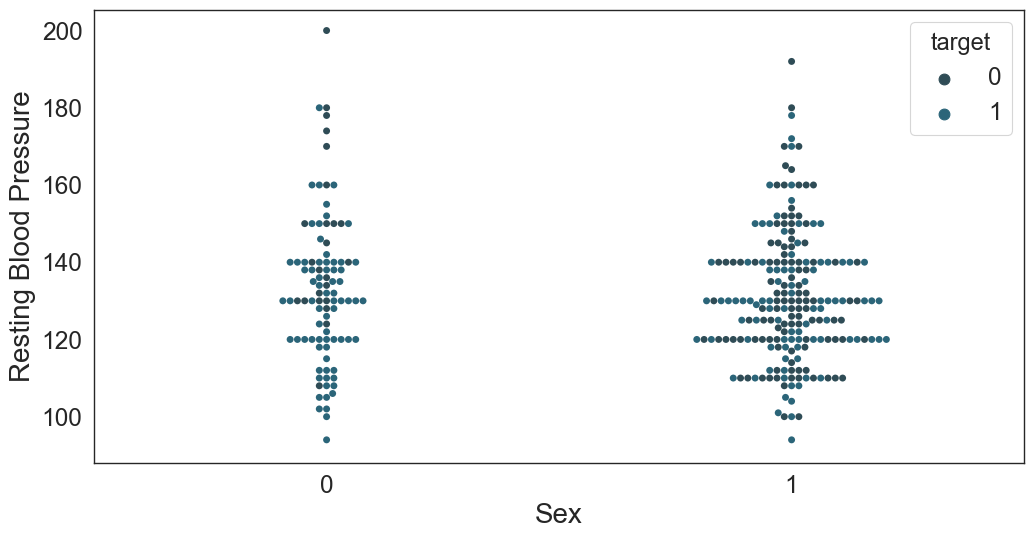

In [37]:
plt.figure(figsize=(12,6),dpi=100)
sns.swarmplot(x='sex', y='trestbps', data=heart, hue='target')
plt.xlabel('Sex')
plt.ylabel('Resting Blood Pressure')
plt.show()

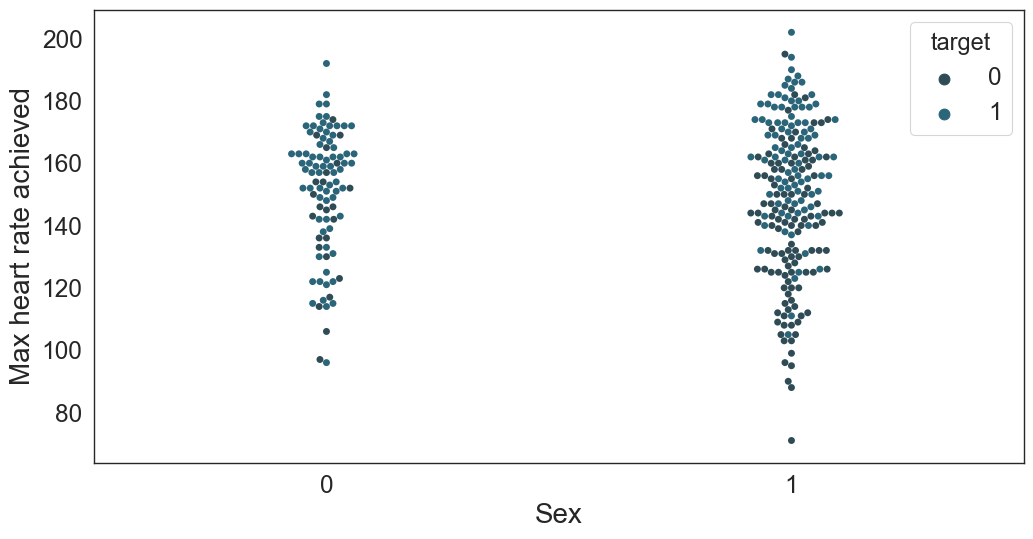

In [38]:
plt.figure(figsize=(12,6),dpi=100)
sns.swarmplot(x='sex', y='thalach', data=heart, hue='target')
plt.xlabel('Sex')
plt.ylabel('Max heart rate achieved')
plt.show()

In [54]:
# Model Selection and Training 
#Liabraries for model selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


#Libraries for various model parameter selection.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn import metrics
from sklearn.metrics import f1_score,plot_roc_curve,accuracy_score,roc_curve,roc_auc_score,recall_score

In [55]:
df = heart
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
X = df.drop('target',axis=1).values
Y = df['target'].values

In [57]:
# Split the dataset into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### 1) Logistic Regression

In [58]:
# Train and predict.
model1 = LogisticRegression(solver='liblinear',max_iter = 1000, random_state = 31)
model1.fit(X_train,Y_train)
Y_pred_lr = model1.predict(X_test) 
y_pred_lr = np.around(Y_pred_lr)

In [59]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
score_lr

85.25

In [60]:
print(metrics.classification_report(Y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



#### 2) KNN

In [61]:
model2 = KNeighborsClassifier(n_neighbors=31,leaf_size=30)
model2.fit(X_train,Y_train)
Y_pred_knn = model2.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
score_knn

68.85

In [62]:
print(metrics.classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63        27
           1       0.70      0.76      0.73        34

    accuracy                           0.69        61
   macro avg       0.68      0.68      0.68        61
weighted avg       0.69      0.69      0.69        61



#### 3) Naive Bayes

In [63]:
gnb = GaussianNB( var_smoothing=1e-50)
gnb.fit(X_train,Y_train)
gnb.predict(X_test)
Y_pred_gnb = gnb.predict(X_test)          
score_gnb = round(accuracy_score(Y_pred_gnb,Y_test)*100,2)
score_gnb

85.25

In [64]:
Y_pred_gnb = np.around(Y_pred_gnb)
print(metrics.classification_report(Y_test,Y_pred_gnb))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



#### 4) Random Forest Classifier 

In [65]:
max_accuracy = 0


for x in range(500):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)

90.16
323


In [66]:
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
Y_pred_rf.shape

(61,)

In [67]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
score_rf

90.16

In [68]:
Y_pred_rf = np.around(Y_pred_rf)
print(metrics.classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



#### 5) Decision Trees Classifier

In [69]:
tclf = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.00001,
    max_features='auto',
    random_state=46)
tclf.fit(X_train, Y_train)
Y_pred_tclf=tclf.predict(X_test)
score_tclf = round(accuracy_score(Y_pred_tclf,Y_test)*100,2)
score_tclf

83.61

In [70]:
print(metrics.classification_report(Y_test,Y_pred_tclf))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.88      0.82      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



Comparison between the models 

In [71]:
scores = [score_lr,score_knn,score_gnb,score_rf,score_tclf]
Models = ["Logistic Regression","KNN CLF","Gaussian Navie Bayes","Random Forest","Decision Tree"]    

for i in range(len(Models)):
    print("The accuracy score achieved using "+Models[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using KNN CLF is: 68.85 %
The accuracy score achieved using Gaussian Navie Bayes is: 85.25 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using Decision Tree is: 83.61 %


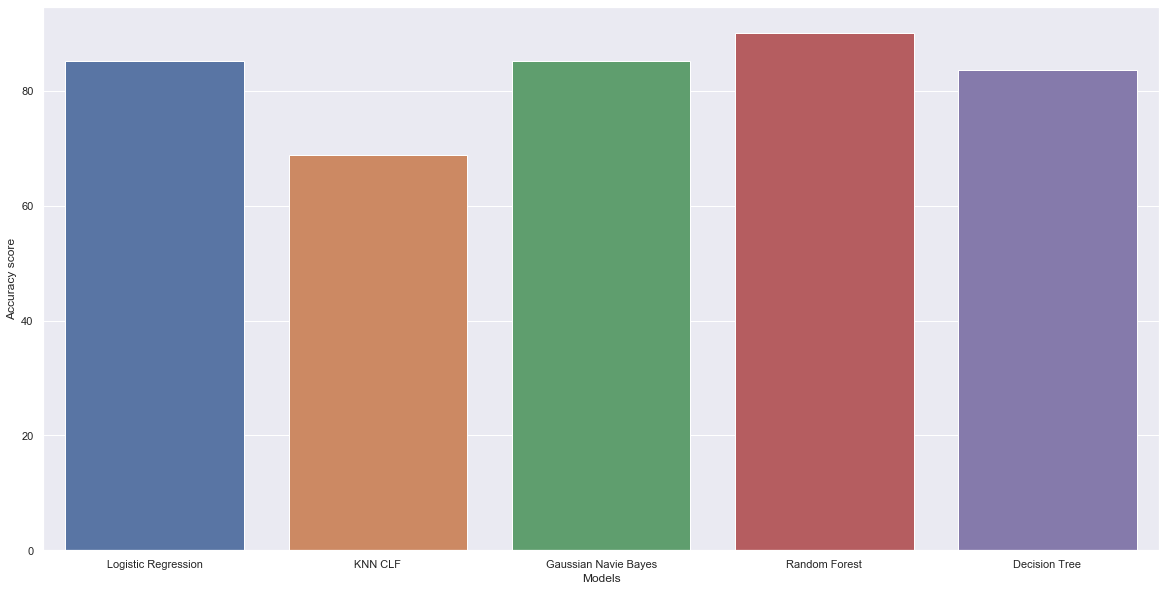

In [72]:
sns.set(style="darkgrid",rc={'figure.figsize':(20,10)})
plt.xlabel("Models")
plt.ylabel("Accuracy score")

sns.barplot(Models,scores)
plt.savefig("AccuracyScores.png")